# Simple Linear Regression - Supervised Model

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variable = feature = estimator = attribute = input

dependent variable   = target  = label     = output

rows = observation, sample

**features** = TV + radio + newspaper

**target** = sales

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Create new independent variable (feature)

In [5]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

In [6]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [7]:
df = df.iloc[:,[0,1,2,4,3]]
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


## Which feature is more suitable for linear regression?

In [8]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")

corr between sales and TV          :  0.7822244248616063
corr between sales and radio       :  0.5762225745710553
corr between sales and newspaper   :  0.22829902637616534
corr between sales and total_spend :  0.8677123027017423


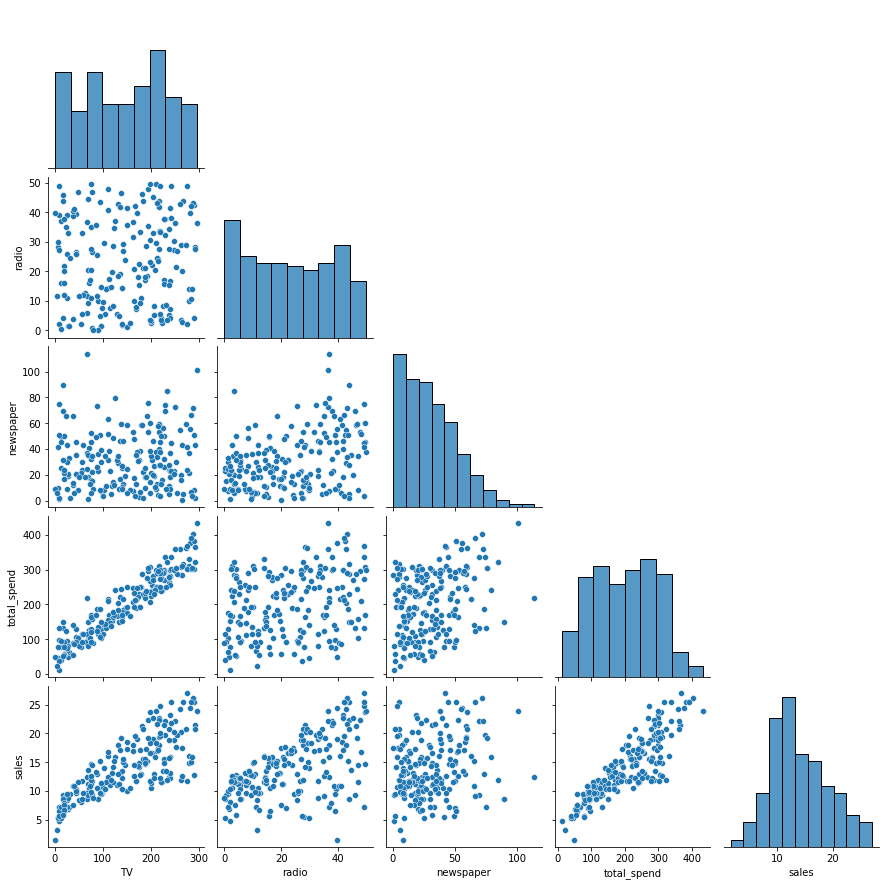

In [9]:
sns.pairplot(df, corner=True);

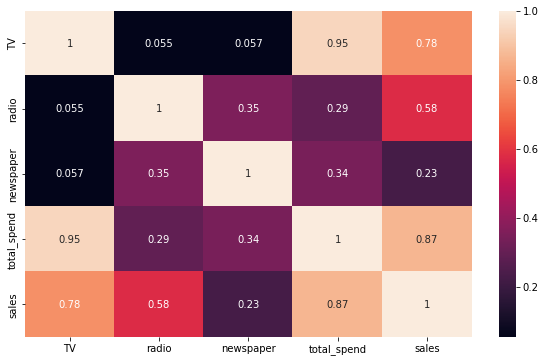

In [10]:
sns.heatmap(df.corr(), annot=True);

In [11]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


## Plotting the relationship between independent variable and dependent variable 

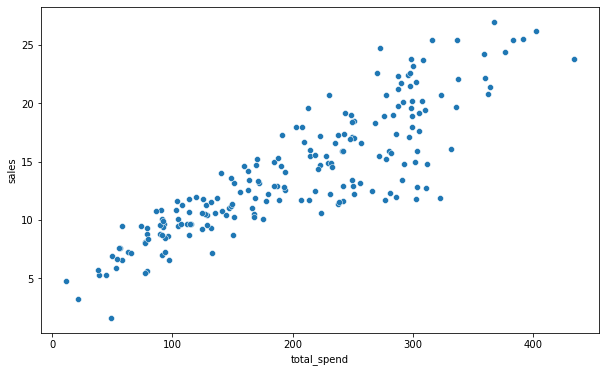

In [12]:
sns.scatterplot(x="total_spend", y="sales", data=df);

## Correlation between independent variable and dependent variable

In [13]:
corr = df["sales"].corr(df["total_spend"])
corr

0.8677123027017423

In [14]:
df["total_spend"].corr(df["sales"])

0.8677123027017423

## Coefficient of determination (R2)

In [15]:
R2_score = corr**2
R2_score

0.75292464025996

A house price ----> 50.000 USD

B house price ----> 60.000 USD


A house ----> 2+1

B house ----> 3+1


If 3,000 USD of the variation in house prices is due to the number of rooms in the houses, what is the Coefficient of determination (R2) of the number of rooms?

### R2_score for the number of rooms in the houses

r2_score = 3000 / (60000-50000)

r2_score = 0.3

## Linear Regression

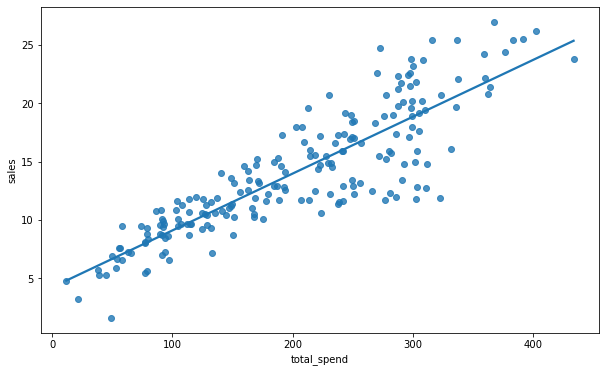

In [16]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None);

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [17]:
# y_pred = b1X + b0

In [18]:
X= df["total_spend"]
y= df["sales"]

## Determination of coefficients (slope and intercept)

In [19]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [20]:
slope, intercept = np.polyfit(X, y, deg=1)

In [21]:
print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.04868787931904817
intercept: 4.243028216036325


## Why do we use the least squares error method to find the regression line that best fits the data?

In [22]:
b1, b0 = np.polyfit(X, y, deg=1)

In [23]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.04868787931904817
b0 : 4.243028216036325


In [24]:
y_pred = b1*X + b0   # b2*X2 + b1*X + b0

In [25]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [26]:
df_2.residual.sum().round()

-0.0

In [27]:
df_2.LSE.sum()

1338.4439761715594

## Prediction with simple linear regression

In [28]:
potential_spend = np.linspace(0, 500, 100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [29]:
predicted_sales_lin = b1* potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

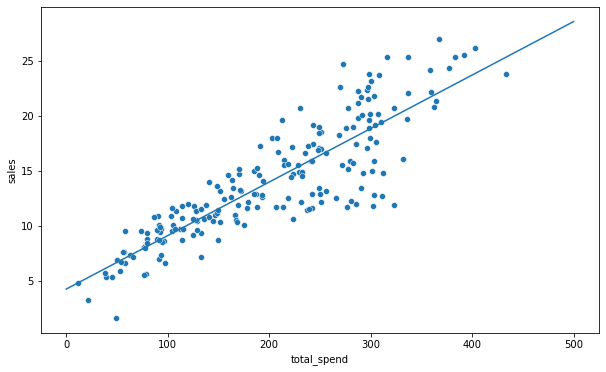

In [62]:
plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x='total_spend',y='sales', data=df);

## How can we improve our predictions?

In [ ]:
###############################################

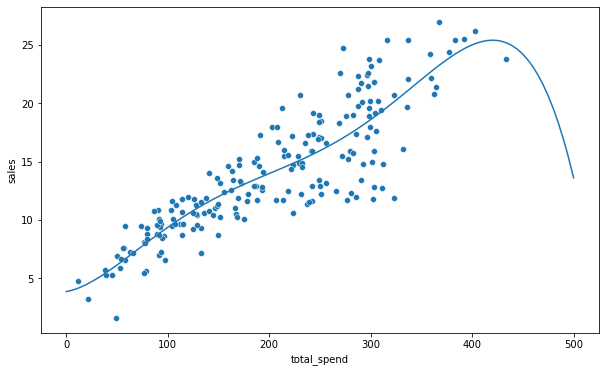

In [47]:
import numpy.polynomial.polynomial as poly

coefs = poly.polyfit(X, y, 5)
potential_spend = np.linspace(0, 500, 100)
ffit = poly.Polynomial(coefs)
sns.scatterplot(x='total_spend',y='sales', data=df);
plt.plot(potential_spend, ffit(potential_spend));

In [42]:
print(coefs)

[ 2.70495053e+00  8.20886302e-02 -1.89392449e-04  3.07615033e-07]


In [46]:
import numpy as np

#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(X, y, 5)

{'r_squared': 0.7597652993343761}

###################################################################
###################################################################

### How to Use polyfit of NumPy?

In [59]:
import numpy as np
x = np.array([ 56755.72171242,  44178.04737774,  40991.80813814,   8814.00098681, 
              43585.51198178,  13574.17183072,   6175.8760297 ,  17829.69832237, 
              53254.85637009,  17522.23018625,  42784.69836164,  36638.18492916, 
              41086.72967373,  18167.77372717,  12706.89121489,  52564.42917946, 
              61995.42280258,  35776.79516181,  30230.22630213,  34524.46986093, 
              13774.60527391,  14258.22933451, 101376.49657434,   9616.64500569, 
              45175.23189338,  38615.99518491,  74355.51585756,  12578.49547344, 
              19242.3664711 ,  16310.988409  ,  20881.76692993,   5734.63362915, 
              25732.01836475,  51545.48360953,  82081.59716162,  11006.2497364 , 
              44974.83187718,  56839.38177423])
y = np.array([7.3, 7.1, 6.9, 6.4, 7.4, 6.5, 6.3, 6.7, 7.6, 5.7, 7.6, 6.5, 7.0, 5.4, 5.6, 7.5, 
              7.0, 7.2, 6.0, 5.9, 5.9, 5.9, 6.9, 6.5, 7.4, 7.3, 7.6, 6.1, 5.4, 6.2, 5.9, 4.7, 
              6.3, 7.3, 7.5, 5.5, 6.8, 6.9])

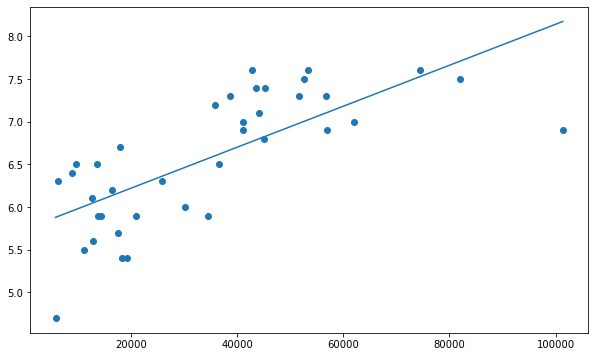

In [49]:
import matplotlib.pyplot as plt
p = np.poly1d(np.polyfit(x, y, 1)) # polyfit ile bulunan coefficient'lari poly1d ile fonksiyona ceviriyoruz.
x_line = np.linspace(np.amin(x), np.amax(x), 200)
plt.scatter(x, y)
plt.plot(x_line, p(x_line))
plt.show()

In [50]:
print(p)

 
2.4e-05 x + 5.742


In [51]:
p.coefficients

array([2.39962998e-05, 5.74175435e+00])

In [52]:
# polyfit multivariate regression'da calismiyor
# bunun disinda r, r-squared, p-value gibi degerleri donmuyor. 
# sadece coefficient'lar ile fonksiyonun elde edilmesini sagliyor

### How to use linregress of SciPy

In [53]:
from scipy import stats
regr_results = stats.linregress(x, y)
print(regr_results)

LinregressResult(slope=2.399629982572951e-05, intercept=5.741754353755326, rvalue=0.720287195322656, pvalue=3.4265564700646986e-07, stderr=3.851624914535861e-06, intercept_stderr=0.15853194959552008)


In [54]:
# the linregress does not support multivariate regression

### How to Use OLS and OLS of statsmodels

In [55]:
import statsmodels.api as sm
x = sm.add_constant(x) # adds an intercept term to the simple linear regression formula
lin_model = sm.OLS(y, x)
regr_results = lin_model.fit()

In [56]:
print(regr_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     38.82
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           3.43e-07
Time:                        14:11:21   Log-Likelihood:                -28.824
No. Observations:                  38   AIC:                             61.65
Df Residuals:                      36   BIC:                             64.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7418      0.159     36.218      0.0

In [57]:
# statsmodels can perform multivariate regression
# One has to add explicitly a constant term for the linear regression with the command
# sm.add_constant()

### How to Use LinearRegression of scikit-learn

In [63]:
x = np.array([ 56755.72171242,  44178.04737774,  40991.80813814,   8814.00098681, 
              43585.51198178,  13574.17183072,   6175.8760297 ,  17829.69832237, 
              53254.85637009,  17522.23018625,  42784.69836164,  36638.18492916, 
              41086.72967373,  18167.77372717,  12706.89121489,  52564.42917946, 
              61995.42280258,  35776.79516181,  30230.22630213,  34524.46986093, 
              13774.60527391,  14258.22933451, 101376.49657434,   9616.64500569, 
              45175.23189338,  38615.99518491,  74355.51585756,  12578.49547344, 
              19242.3664711 ,  16310.988409  ,  20881.76692993,   5734.63362915, 
              25732.01836475,  51545.48360953,  82081.59716162,  11006.2497364 , 
              44974.83187718,  56839.38177423])
y = np.array([7.3, 7.1, 6.9, 6.4, 7.4, 6.5, 6.3, 6.7, 7.6, 5.7, 7.6, 6.5, 7.0, 5.4, 5.6, 7.5, 
              7.0, 7.2, 6.0, 5.9, 5.9, 5.9, 6.9, 6.5, 7.4, 7.3, 7.6, 6.1, 5.4, 6.2, 5.9, 4.7, 
              6.3, 7.3, 7.5, 5.5, 6.8, 6.9])

In [64]:
from sklearn import linear_model
linmodel = linear_model.LinearRegression(fit_intercept=True) 
linmodel.fit(x.reshape(-1, 1), y)

LinearRegression()

In [65]:
(slope, intercept) = (linmodel.coef_[0], linmodel.intercept_)
print(slope, intercept)

2.3996299825729496e-05 5.741754353755327


In [66]:
print(linmodel.score(x.reshape(-1, 1), y))

0.518813643745778


### How to Use regplot of seaborn

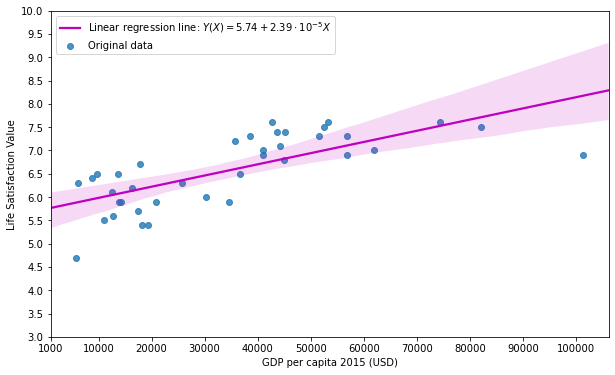

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x = x, y = y, ci=95, order=1,line_kws={'label': 'Linear regression line: $Y(X)=5.74+2.39\cdot 10^{-5} X$', 'color': 'm'}, seed=1,truncate=False, label="Original data")
ax.set_xlabel("GDP per capita 2015 (USD)")
ax.set_ylabel("Life Satisfaction Value")
ax.set_xticks([1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])
ax.set_yticks(np.arange(3.0, 10.5, 0.5))
ax.legend(loc="upper left")
plt.show()